# Import libraries

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pandas as pd
import os
import nltk
from nltk.corpus import stopwords
import string
import seaborn as sns

# Read dataset

The dataset contains social media posts in a tab delimited UTF-8 CSV format. Each row represents one tweet containing tweetId, tweetText, userId, imageId(s), username, timestamp and label. Each tweet’s text contains mention of a linked or embedded image/video. Multimedia content will not be considered by the ML model.

In [109]:
txt_file = r"mediaeval-2015-trainingset.txt"
csv_file = r"mediaeval-2015-trainingset.csv"

in_txt = csv.reader(open(txt_file, "r"), delimiter = '\t')
out_csv = csv.writer(open(csv_file, 'w'))

out_csv.writerows(in_txt)

# Load dataset

In terms of the availability of the data, there are two dataset: the training and test set. There are 14,277 and 3,740 labelled social media posts respectively. Each tweet is labelled with fake, real or humour. The humour label will be treated as fake label. These two labels represent the ground truth variables.

In [110]:
def load_tweets_data(name): 
    csv_path = os.path.join("", name) 
    return pd.read_csv(csv_path)

In [113]:
trainTweets = load_tweets_data("mediaeval-2015-trainingset.csv")
testTweets = load_tweets_data("mediaeval-2015-testset.csv")

In [114]:
trainTweets.shape

(14253, 7)

In [115]:
testTweets.shape

(3755, 7)

In [79]:
trainTweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14277 entries, 0 to 14276
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweetId     14277 non-null  int64 
 1   tweetText   14277 non-null  object
 2   userId      14277 non-null  int64 
 3   imageId(s)  14277 non-null  object
 4   username    14277 non-null  object
 5   timestamp   14277 non-null  object
 6   label       14277 non-null  object
dtypes: int64(2), object(5)
memory usage: 780.9+ KB


In [80]:
trainTweets.head()

,tweetId,tweetText,userId,imageId(s),username,timestamp,label
0,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake
1,262995061304852481,@milenagimon: Miren a Sandy en NY! Tremenda i...,192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake
3,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake
4,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake


# Data cleaning and preparation

In [81]:
trainTweets.drop(["timestamp"],axis=1,inplace=True)
trainTweets.drop(["tweetId"],axis=1,inplace=True)
trainTweets.drop(["userId"],axis=1,inplace=True)
trainTweets.drop(["username"],axis=1,inplace=True)

In [82]:
trainTweets.head()

,tweetText,imageId(s),label
0,¿Se acuerdan de la película: “El día después d...,sandyA_fake_46,fake
1,@milenagimon: Miren a Sandy en NY! Tremenda i...,sandyA_fake_09,fake
2,"Buena la foto del Huracán Sandy, me recuerda a...",sandyA_fake_09,fake
3,Scary shit #hurricane #NY http://t.co/e4JLBUfH,sandyA_fake_29,fake
4,My fave place in the world #nyc #hurricane #sa...,sandyA_fake_15,fake


## Convert text to lower case

In [83]:
# Convert to lowercase
trainTweets['tweetText'] = trainTweets['tweetText'].apply(lambda x: x.lower())
trainTweets.head()

,tweetText,imageId(s),label
0,¿se acuerdan de la película: “el día después d...,sandyA_fake_46,fake
1,@milenagimon: miren a sandy en ny! tremenda i...,sandyA_fake_09,fake
2,"buena la foto del huracán sandy, me recuerda a...",sandyA_fake_09,fake
3,scary shit #hurricane #ny http://t.co/e4jlbufh,sandyA_fake_29,fake
4,my fave place in the world #nyc #hurricane #sa...,sandyA_fake_15,fake


## Remove punctuations

In [103]:
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

trainTweets['tweetText'] = trainTweets['tweetText'].apply(punctuation_removal)
trainTweets.head()

,tweetText,imageId(s),label,topic
0,¿se acuerdan de la película “el día después de...,sandyA_fake_46,fake,sandyA
1,milenagimon miren sandy en ny tremenda imagen ...,sandyA_fake_09,fake,sandyA
2,buena la foto del huracán sandy recuerda la pe...,sandyA_fake_09,fake,sandyA
3,scary shit hurricane ny httptcoe4jlbufh,sandyA_fake_29,fake,sandyA
4,fave place world nyc hurricane sandy statueofl...,sandyA_fake_15,fake,sandyA


## Remove english stopwords

In [86]:
nltk.download('stopwords')
stop = stopwords.words('english')

trainTweets['tweetText'] = trainTweets['tweetText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /Users/alked/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [87]:
trainTweets.head()

,tweetText,imageId(s),label
0,¿se acuerdan de la película “el día después de...,sandyA_fake_46,fake
1,milenagimon miren sandy en ny tremenda imagen ...,sandyA_fake_09,fake
2,buena la foto del huracán sandy recuerda la pe...,sandyA_fake_09,fake
3,scary shit hurricane ny httptcoe4jlbufh,sandyA_fake_29,fake
4,fave place world nyc hurricane sandy statueofl...,sandyA_fake_15,fake


## Convert homour label to fake label

In [88]:
trainTweets.loc[trainTweets['label'] == 'humor', 'label'] = 'fake'

## Create "topic" column from "imageId"

In [89]:
print(trainTweets["imageId(s)"].iloc[0])

sandyA_fake_46


In [90]:
# Generate topics
topics = [] 
for value in trainTweets["imageId(s)"]: 
    topics.append(str(value).split("_")[0])
                  
trainTweets["topic"] = topics    
trainTweets.head()

,tweetText,imageId(s),label,topic
0,¿se acuerdan de la película “el día después de...,sandyA_fake_46,fake,sandyA
1,milenagimon miren sandy en ny tremenda imagen ...,sandyA_fake_09,fake,sandyA
2,buena la foto del huracán sandy recuerda la pe...,sandyA_fake_09,fake,sandyA
3,scary shit hurricane ny httptcoe4jlbufh,sandyA_fake_29,fake,sandyA
4,fave place world nyc hurricane sandy statueofl...,sandyA_fake_15,fake,sandyA


In [91]:
trainTweets['label'].value_counts()

fake    9356
real    4921
Name: label, dtype: int64

# Basic data exploration


## Get unique topics

In [93]:
topics = trainTweets.topic.unique()
print(topics)

['sandyA' 'sandyB' 'boston' 'columbianChemicals' 'bringback' 'passport'
 'underwater' 'elephant' 'sochi' 'malaysia' 'livr' 'pigFish']


## Fake and real posts

As it can be seen below, there are over 9000 fake posts (including humour labels) and the number of real posts is just under 5000. We can deduce that training set is unbalanced and can bring issues in the ML model. Further re-sampling can be done to to get a fair balance.

label
fake    9356
real    4921
Name: tweetText, dtype: int64


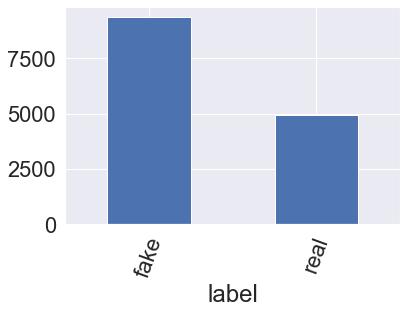

In [94]:
print(trainTweets.groupby(['label'])['tweetText'].count())
trainTweets.groupby(['label'])['tweetText'].count().plot(kind='bar')
plt.xticks(rotation=70)
plt.show()

# Word clouds

Below there are two words clouds that illustrate the frequent word cloud of real and fake tweets. Stop words, topic words and words such as ”rt” and ”via” (defining the Twitter actions) have been removed to provide a better visualisation with the aim to spot pattern between fake and real. Even though few top words are in common, It can be seen that the most used words describing real and fake tweets are significantly different.

In [97]:
event_words = ['sandy', 'hurricane', 'hurricanesandy', 'new', 'nyc', 'ny', 'york', 'statue', 'statueofliberty', 
                   'shark', 'newyork', 'tomb', 'sochi', 'soldier', 'liberty', 'jersey', 'nj', 'mh370', 'huracán', 
                   'boston', 'manhattan', 'bringbackourgirls', 'columbianchemicals', 'flooding', 'flood', 'cuba']
en_stop_words = nltk.corpus.stopwords.words('english')
sp_stop_words = nltk.corpus.stopwords.words('spanish')
twitter = ['rt']

block_words = en_stop_words + sp_stop_words + event_words + twitter

In [99]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Custom Colormap
from matplotlib.colors import LinearSegmentedColormap
colors = ["#000000", "#111111", "#101010", "#121212", "#212121", "#222222"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

def generate_word_cloud(input_tweets):
    tweets = input_tweets
    tweets_text = " ".join(tweets.tweetText.to_numpy().tolist())
    
    # wordcloud of ham messages
    wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='White', colormap=cmap, collocations=False, stopwords = block_words).generate(tweets_text)
    plt.figure(figsize=(16,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off') # turn off axis
    plt.show()
    wordcloud.to_file("real.png")

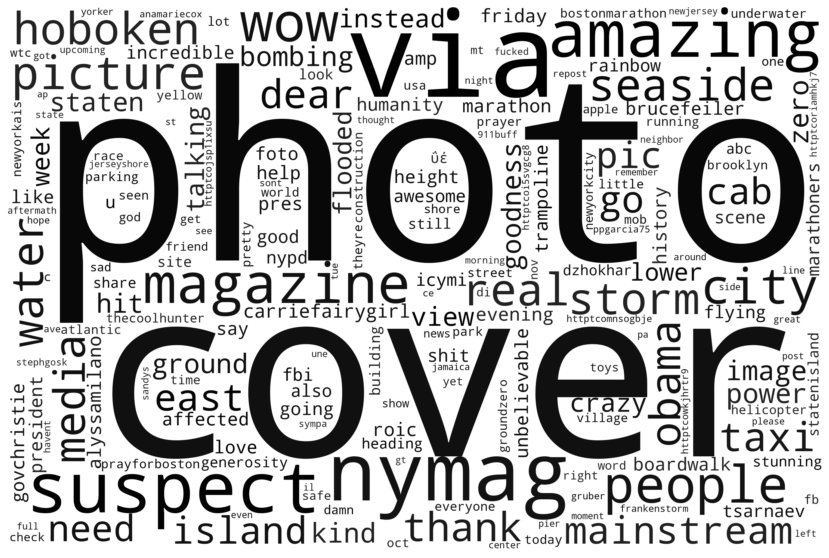

In [100]:
generate_word_cloud(trainTweets[trainTweets['label'] == 'real'])

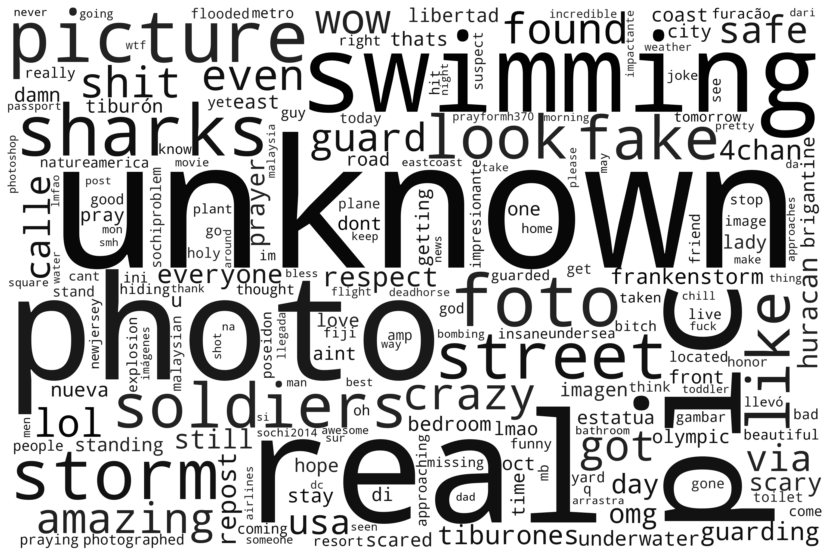

In [101]:
generate_word_cloud(trainTweets[trainTweets['label'] == 'fake'])

In [55]:
sns.set_theme(style="ticks", color_codes=True)

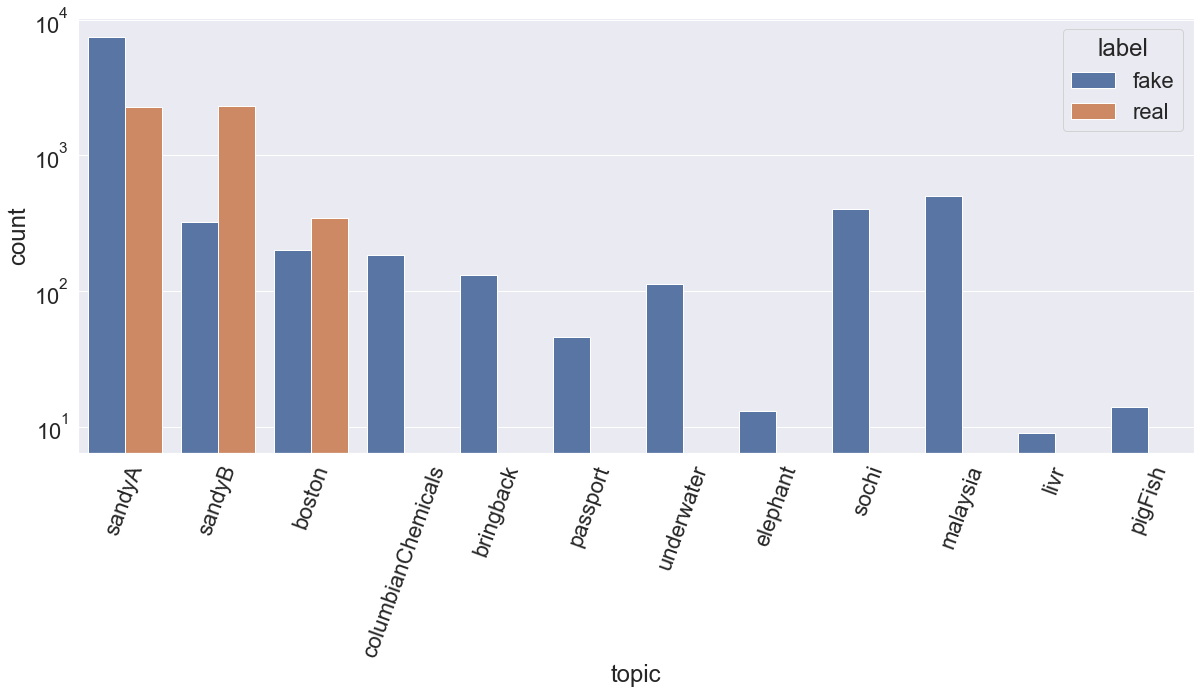

In [57]:
plt.figure(figsize=(20, 8))
sns.set(font_scale=2)  # crazy big

ax = sns.countplot(x="topic", hue="label", data=trainTweets)
# Draw a nested barplot by species and sex
ax.set_yscale("log")
plt.xticks(rotation=70)
plt.show()